# **Poço Quadrado Finito**

## **Poço Finito de Estado Ligado**
Este notebook utiliza a técnica do notebook Solving the Schrödinger Equation para calcular os estados ligados de um poço finito quadrado. Existem apenas algumas alterações na solução do poço quadrado. O potencial é diferente, pois possui uma pequena área que não é zero, mas sim um valor negativo, aqui representado como $-V_0$. Para que nosso cálculo seja aproximadamente correto, precisamos garantir que todo o espaço de cálculo, de $-a/2$ a $a/2$, seja muito maior do que o poço, que vai de $-b/2.$ a $b/2$. O fator 100 escolhido aqui provavelmente é maior do que o necessário. Também precisamos de um valor $N$
bastante grande, o número de etapas em nosso espaço, para que a função de onda resultante seja suave na área do poço. Talvez seja necessário ter um pouco de paciência ao avaliar o poço com essas configurações!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4097
a = 200.0
b = 2.
x = np.linspace(-a/2.,a/2.,N)
# Queremos armazenar o tamanho do passo, esta é a maneira confiável:
h = x[1]-x[0] # Deve ser igual a 2*np.pi/(N-1)
V0 = -6.
V=np.zeros(N)
for i in range(N):
    if x[i]> -b/2. and x[i]< b/2.:
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V)
E,psiT = np.linalg.eigh(H) # Isso calcula os autovalores e os autovetores
psi = np.transpose(psiT)   # Tomamos a transposição de psiT para os vetores de função de onda que podem ser acessados ​​como psi[n]
#

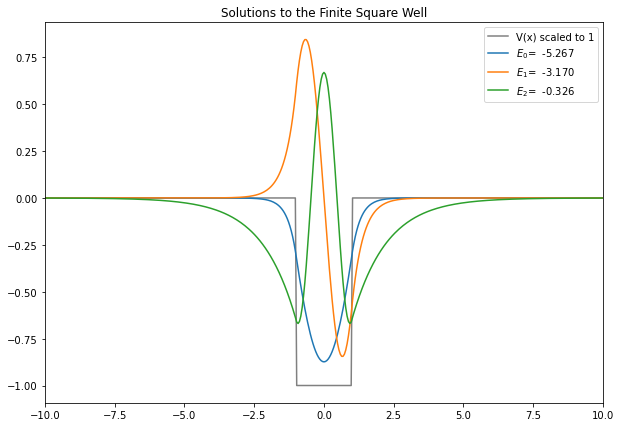

In [2]:
plt.figure(figsize=(10,7))
plt.xlim((-5*b,5*b))
plt.plot(x,V/(-V0),color="Gray",label="V(x) scaled to 1")
for i in range(5):
    if E[i]<0:                 # Apenas plote os estados vinculados. Os estados de dispersão não são calculados de forma confiável.
        if psi[i][N-10] < 0:   # Inverta as funções de onda se for negativo em x grande, para que os gráficos sejam mais consistentes.
            plt.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
        else:
            plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
plt.title("Solutions to the Finite Square Well")
plt.legend()
#plt.savefig("Finite_Square_Well_WaveFunctions.pdf")
plt.show()